In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../00_data/crypto_data.csv')
df.head()

,Rank,Currency_Name,Market_Capital,Price,Circulating_Supply,Volume(24h),Change(24h)
0,1,Bitcoin,6.021918e+10,3631.72,1.658145e+07,1.226800e+09,-0.0084
1,2,Ethereum,2.506128e+10,264.44,9.477220e+07,4.625760e+08,0.0132
2,3,Bitcoin Cash,6.815418e+09,410.47,1.660378e+07,2.608570e+08,-0.0322
3,4,Ripple,6.646330e+09,0.17,3.834384e+10,4.194500e+07,-0.0042
4,5,Dash,2.607961e+09,344.36,7.573378e+06,9.714230e+07,0.0362


In [3]:
# Extract the first 3 rows of dataframe then convert it into dictionary 
# with the column names as the key values and their values as list into a dictionary

#loc indexing is inclsuive, so for 3 rows the range would be 0,1,2 and 2 is included in last index of row as df.loc[:2,col]

dicti = {}
for col in list(df.columns):
    dicti[col] = list(df.loc[:2,col].values)
dicti

{'Rank': [1, 2, 3],
 'Currency_Name': ['Bitcoin', 'Ethereum', 'Bitcoin Cash'],
 'Market_Capital': [60219183594.0, 25061275598.0, 6815417939.0],
 'Price': [3631.72, 264.44, 410.47],
 'Circulating_Supply': [16581450.0, 94772198.0, 16603775.0],
 'Volume(24h)': [1226800000.0, 462576000.0, 260857000.0],
 'Change(24h)': [-0.0084, 0.0132, -0.0322]}

In [4]:
# Return the Curreny_Name which has highest value in Price column

df.iloc[df['Price'].idxmax()].Currency_Name

'Bitcoin'

In [5]:
# Return the mean value of the Change(24h) column
df['Change(24h)'].mean()

0.013364000000000003

In [6]:
# Return the sorted (Ascending order) list of currency names which are having Market_Capital 
# greater than '2000000000' and Price greater than or equal to '200'

list(df[(df['Market_Capital'] > 2000000000) & (df['Price'] >= 200)].Currency_Name.sort_values())

['Bitcoin', 'Bitcoin Cash', 'Dash', 'Ethereum']

In [7]:
# Return the lowest value in Volume(24h) column

df['Volume(24h)'].min()

4460.0

Text(0.5, 1.0, 'Heatmap Correlation')

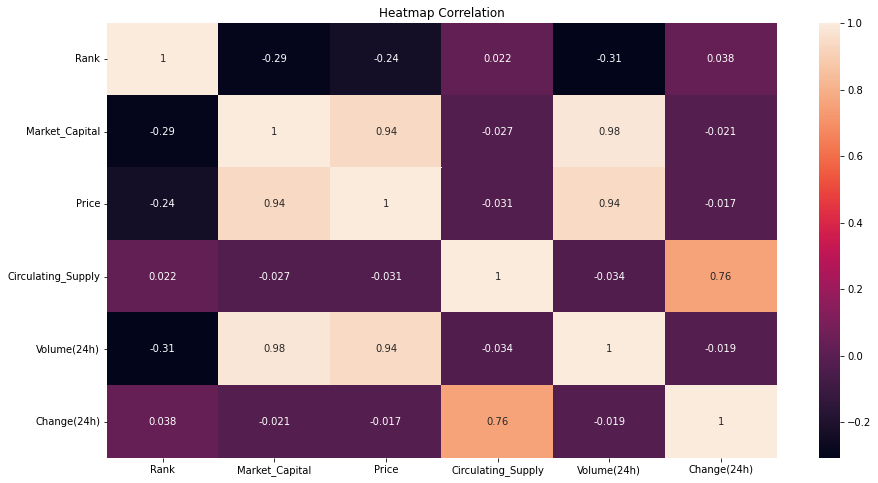

In [8]:
# Draw the Heatmap with correlation between Rank, 
# Marcket Captial, Price, Circulating_Supply, Volume(24h) and Change(24h)
fig, ax = plt.subplots(figsize=(15,8))

k = df.copy()
k.drop(['Currency_Name'], axis=1, inplace= True)

ax = sns.heatmap(k.corr(), annot= True)
ax.set_title('Heatmap Correlation')

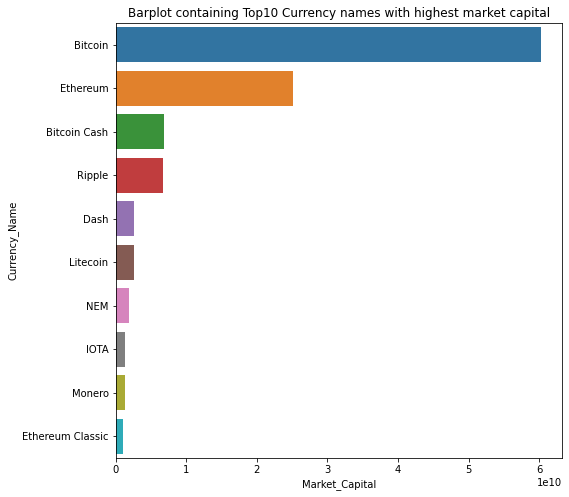

In [9]:
# Draw the barplot containing Top 10 currency names with highest Market Capital 

fig7, ax7 = plt.subplots(figsize=(8,8))

k = df.sort_values(by='Market_Capital', ascending=False)[:10]
plt.title('Barplot containing Top10 Currency names with highest market capital')

q7 = sns.barplot(data = k, x='Market_Capital', y= 'Currency_Name')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0.5, 1.0, 'violinplot for Change(24h)')

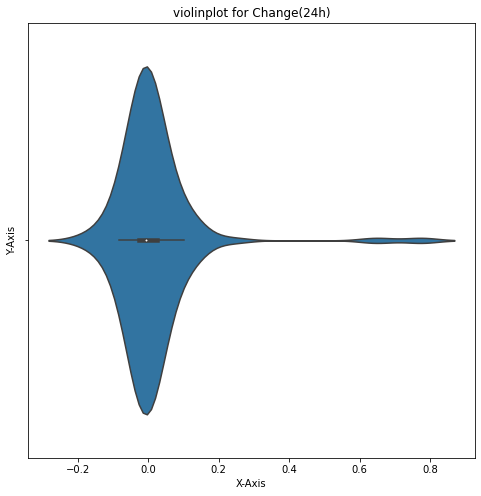

In [10]:
# Draw the violinplot that represents the graph of Change(24h).

fig8, ax8 = plt.subplots(figsize=(8,8))

ax8 = sns.violinplot(df['Change(24h)'], orient='v')
ax8.set_xlabel('X-Axis')
ax8.set_ylabel('Y-Axis')
plt.title('violinplot for Change(24h)')

Text(0.5, 1.0, 'scatterplot')

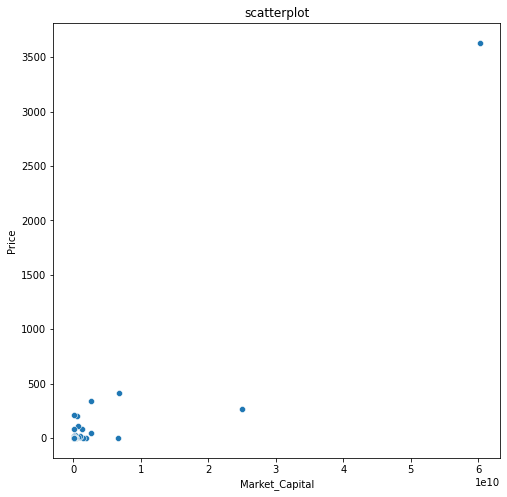

In [11]:
# Draw a scatterplot that represents the relation between Price and Market Capital

fig9, ax9 = plt.subplots(figsize=(8,8))

l = df.sort_values(by='Market_Capital', ascending=False)[:50]
sns.scatterplot(data=l, x='Market_Capital', y='Price')
plt.title('scatterplot') 

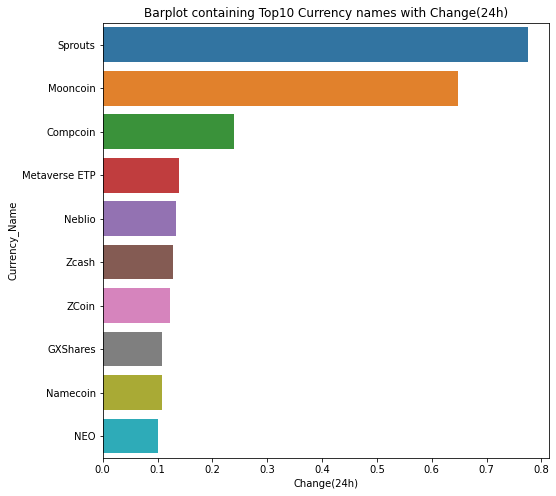

In [12]:
# Draw the barplot containing Top 10 currency names with Change(24h) in descending order

fig10, ax10 = plt.subplots(figsize=(8,8))


k =df.sort_values(by='Change(24h)', ascending=False)[:10]
plt.title('Barplot containing Top10 Currency names with Change(24h)')
sns.barplot(data = k, x='Change(24h)', y= 'Currency_Name')